#### Khai báo thư viện cần dùng

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

#### Khởi tạo dữ liệu

In [44]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [45]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,57.037146,2.079825,9.498598,31.315632,18.388100
1,54.528591,14.363599,11.358078,6.127434,19.493787
2,58.526985,6.093247,10.781676,21.337218,19.490276
3,58.345862,21.438024,7.929698,13.156001,22.896675
4,32.785228,6.866817,8.417163,4.813628,16.121670


#### Trực quan hóa dữ liệu sinh ra

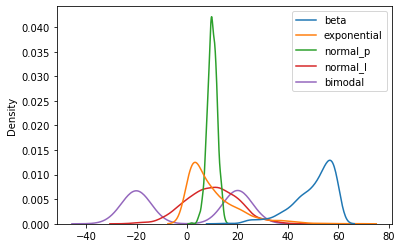

In [46]:
sns.kdeplot(data=df);

#### Hiển thị thống kê về dữ liệu sinh ra

In [47]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.296413,10.218028,10.007571,9.820450,-0.017651
std,8.378854,10.057852,1.908259,10.152141,20.395851
min,14.053045,0.007621,1.873943,-22.912093,-30.243315
25%,45.612647,2.831890,8.770340,2.895362,-20.169880
50%,52.672321,7.289642,9.960909,9.944212,0.482974
75%,56.687250,14.425501,11.320477,17.139974,20.025101
max,59.996955,67.446030,15.466174,44.141488,29.536394


#### Thêm một đặc trưng với giá trị lớn hơn nhiều

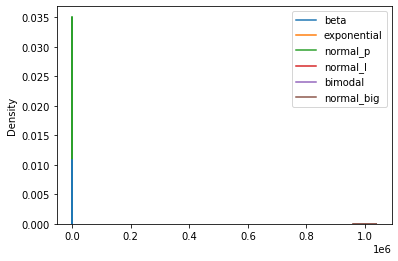

In [48]:
# Khi thêm đặc trưng này, do giá trị của chúng khác xa với khoảng giá trị ban đầu nên nếu ta biểu diễn bằng đồ thị thì các dữ liệu lúc trước sẽ co cụm lại 1 bên
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df);

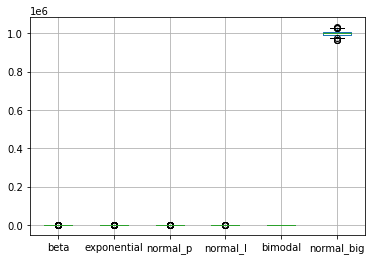

In [49]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot();

#### Chuẩn hóa với Robust Scaling

In [50]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [51]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.394129,-0.449370,-0.181289,1.500316,0.445457,-0.125930
1,0.167615,0.610160,0.547880,-0.267945,0.472965,0.882490
2,0.528657,-0.103194,0.321852,0.799812,0.472877,-0.818440
3,0.512302,1.220360,-0.796510,0.225474,0.557624,-1.637570
4,-1.795739,-0.036471,-0.605358,-0.360177,0.389071,0.280582


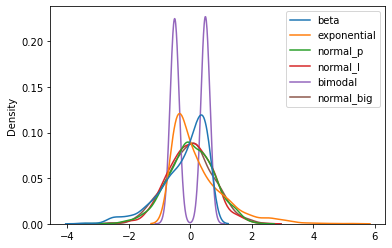

In [52]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s);

In [53]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,-0.214537,2.525862e-01,1.829794e-02,-8.688335e-03,-0.012455,-0.010104
std,0.756583,8.675340e-01,7.482965e-01,7.127005e-01,0.507423,0.765468
min,-3.487193,-6.281063e-01,-3.171189e+00,-2.306578e+00,-0.764431,-2.628163
25%,-0.637465,-3.845007e-01,-4.668648e-01,-4.948432e-01,-0.513817,-0.515819
50%,0.000000,3.827234e-17,-3.482999e-16,6.245005e-17,0.000000,0.000000
75%,0.362535,6.154993e-01,5.331352e-01,5.051568e-01,0.486183,0.484181
max,0.661390,5.188754e+00,2.158811e+00,2.400717e+00,0.722812,2.376495


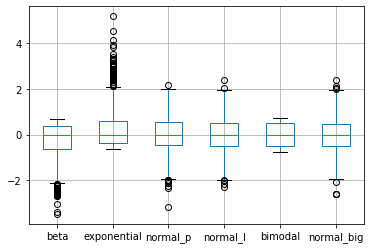

In [54]:
df_s.boxplot();

In [55]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.4871926591834654,
 -0.6281063492316007,
 -3.171188503607253,
 -2.306577760827575,
 -0.7644309760718718,
 -2.6281626673392826]

In [56]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6613901248699976,
 5.188753600819176,
 2.1588111737158466,
 2.4007165709580804,
 0.7228121516774968,
 2.3764946983452906]

In [57]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.26723213e+01, 7.28964177e+00, 9.96090919e+00, 9.94421177e+00,
       4.82973693e-01, 9.99960834e+05])